In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from fastai.vision import *
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

# Preparing the data

In [3]:
dataset_dir = Path('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/')
dataset_dir.ls()

[PosixPath('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/valid.csv'),
 PosixPath('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/test.csv'),
 PosixPath('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/models'),
 PosixPath('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/train.csv'),
 PosixPath('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/.valid.csv')]

In [4]:
train = pd.read_csv('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/train.csv')
train.head(10)

,ID,Tweet,Influenza,Diarrhea,Hayfever,Cough,Headache,Fever,Runnynose,Cold
0,1en,The cold makes my whole body weak.,0,0,0,0,0,0,0,1
1,2en,It's been a while since I've had allergy sympt...,0,0,1,0,0,0,1,0
2,3en,I'm so feverish and out of it because of my al...,0,0,1,0,0,1,1,0
3,4en,"I took some medicine for my runny nose, but it...",0,0,0,0,0,0,1,0
4,5en,I had a bad case of diarrhea when I traveled t...,0,0,0,0,0,0,0,0
5,6en,It takes a millennial wimp to call in sick jus...,0,0,0,1,0,0,0,0
6,7en,"I'm not going today, because my stuffy nose is...",0,0,0,0,0,0,1,0
7,8en,I never thought I would have allergies.,0,0,1,0,0,0,1,0
8,9en,I have a fever but I don't think it's the kind...,0,0,0,0,0,1,0,1
9,10en,My phlegm has blood in it and it's really gross.,0,0,0,1,0,0,0,0


It contains one line per tweet, with multiple labels ('negative' or 'positive').

In [5]:
train['Tweet'][:4]

0                   The cold makes my whole body weak.
1    It's been a while since I've had allergy sympt...
2    I'm so feverish and out of it because of my al...
3    I took some medicine for my runny nose, but it...
Name: Tweet, dtype: object

In [6]:
label_cols = ['Influenza', 'Diarrhea', 'Hayfever', 'Cough', 'Headache', 'Fever',
       'Runnynose', 'Cold']

In [7]:
X = train['Tweet'][:]
y = train[label_cols]

In [8]:
# Split training set up into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=42)

In [9]:
X_train = X_train.to_frame()
X_valid = X_valid.to_frame()

In [10]:
X_train[label_cols] = y_train
X_valid[label_cols] = y_valid

In [11]:
# Giving them correct names
train_df = X_train
valid_df = X_valid

In [12]:
train_df.head(10)

,Tweet,Influenza,Diarrhea,Hayfever,Cough,Headache,Fever,Runnynose,Cold
1023,I've had an intense headache since this morning.,0,0,0,0,1,0,0,0
985,I got diarrhea from the rice bowl that my gran...,0,1,0,0,0,0,0,0
1083,"My daughter got a cold from my wife, so she's ...",0,0,0,0,0,1,0,1
978,"Science advances, but colds still won't go away.",0,0,0,0,0,0,0,0
757,I never thought I'd develop allergies.,0,0,1,0,0,0,1,0
32,It's not unusual for lymph nodes to get swolle...,0,0,0,0,0,0,0,0
888,"My brother says he has the flu, and he's been ...",0,0,0,0,0,0,0,0
1290,I've been doing terrible lately. I have diarrhea.,0,1,0,0,0,0,0,0
1110,I drank tab water during my trip in Nepal and ...,0,0,0,0,0,0,0,0
124,I woke up with symptoms of diarrhea.,0,1,0,0,0,0,0,0


In [13]:
valid_df.head(10)

,Tweet,Influenza,Diarrhea,Hayfever,Cough,Headache,Fever,Runnynose,Cold
998,My stomach has been hurting like hell since th...,0,1,0,0,0,0,0,0
1621,"It's a mild headache, it'll be fine.",0,0,0,0,1,0,0,0
611,How do you say diarrhea in English?,0,0,0,0,0,0,0,0
514,I woke up with a stomachache and it turned out...,0,1,0,0,0,0,0,0
413,It's unbelievable that I caught a cold in Spain.,0,0,0,0,0,0,0,1
1074,I wonder if there's any flu vaccine left.,0,0,0,0,0,0,0,0
538,"To make your congestion go away, I suggest tha...",0,0,0,0,0,0,1,0
482,"I'm stuck at home, because I have the flu.",1,0,0,0,0,1,0,0
398,I wonder if there's any gender difference in g...,1,0,0,0,0,1,0,0
1673,I haven't had a headache this bad in a long ti...,0,0,0,0,1,0,0,0


 The dataset contains mulitple labels

In [14]:
train_lbl_names = train_df.columns[2:]
train_lbl_names

Index(['Diarrhea', 'Hayfever', 'Cough', 'Headache', 'Fever', 'Runnynose',
       'Cold'],
      dtype='object')

In [15]:
# Class weights
cls_weights = pd.Series(np.ones(8,)*.5,index=train_df.columns[1:])
cls_weights

Influenza    0.5
Diarrhea     0.5
Hayfever     0.5
Cough        0.5
Headache     0.5
Fever        0.5
Runnynose    0.5
Cold         0.5
dtype: float64

In [16]:
trn_lbl = []
for i, row in train_df.iterrows():
    trn_lbl.append(train_lbl_names[(row[2:]==1)].tolist())

In [17]:
# The positive labels for the 10 first rows
trn_lbl[:10]

[['Headache'],
 ['Diarrhea'],
 ['Fever', 'Cold'],
 [],
 ['Hayfever', 'Runnynose'],
 [],
 [],
 ['Diarrhea'],
 [],
 ['Diarrhea']]

# Language model

In [18]:
test_df = pd.read_csv('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/test.csv')

In [92]:
test_df

,ID,Tweet,Influenza,Diarrhea,Hayfever,Cough,Headache,Fever,Runnynose,Cold
0,1921en,I went on a trip and got the flu as a souvenir.,1,0,0,0,0,1,0,0
1,1922en,Difficult bosses are one kind of headache,0,0,0,0,0,0,0,0
2,1923en,I'm dying and need someone to translate for me...,0,0,0,0,0,0,0,0
3,1924en,Flu crisis.,1,0,0,0,0,1,0,0
4,1925en,"I have a horribly stuffy nose, there's no way ...",0,0,0,0,0,0,1,0
5,1926en,"I have a headache, so I've decided to go home.",0,0,0,0,1,0,0,0
6,1927en,I got the flu and everyone in my club laughed ...,1,0,0,0,0,1,0,0
7,1928en,I wonder how you say diarrhea in English.,0,0,0,0,0,0,0,0
8,1929en,"I've heard of Spanish flu and Hong Kong flu, i...",0,0,0,0,0,0,0,0
9,1930en,I wonder if dogs get things like stuffy noses?,0,0,0,0,0,0,0,0


In [19]:
data_lm = TextLMDataBunch.from_df(path=dataset_dir, train_df=train_df, valid_df=valid_df, test_df = test_df,
                                  label_cols=label_cols ,bs=64, text_cols='Tweet')

In [20]:
data_lm.show_batch(10)

idx,text
0,"'s not unusual for lymph nodes to get swollen , even when there 's no fever . xxbos xxmaj my brother says he has the flu , and he 's been xxunk since last night . xxbos i 've been doing terrible lately . i have diarrhea . xxbos i drank xxunk water during my trip in xxmaj nepal and i got diarrhea . xxbos i woke up with symptoms"
1,"xxmaj then xxunk i found out on her blog that she had actually gone to an xxunk xxunk , which made me laugh . xxbos i 've been congested , and now i have a headache . i xxunk to take the day off , but i could n't xxunk do it and i ended up going to work . xxbos xxmaj it looks like my allergies are back ."
2,"xxbos xxmaj my eyes are xxunk with a xxunk xxunk . xxbos xxmaj the bird flu is really xxunk . xxbos i got this urgent translation project and it 's gon na xxunk my weekend . xxmaj that 's a headache . xxbos xxmaj my stomach has been acting up , and i get the runs all the time . xxbos i have allergies , and i 'm not going"
3,"what ever happened to the contract translation job ? i hear they have a headache from the tight xxunk . i 'm gon na xxunk xxbos i feel weak and have chills guess it 's a cold xxbos i 'm wondering if i should report to school that my stomach is acting up and i 'm getting diarrhea . xxbos xxmaj on xxup tv , xxunk from the xxmaj ministry"
4,"god , my diarrhea wo n't stop . xxbos xxmaj my personal take is that a fever is n't a big deal if it 's xxunk , but i do n't know if that 's true . xxbos xxmaj fake coughing is so annoying . xxbos i wonder if i caught a bug since i have a high fever . xxbos xxmaj somebody tell me how to get rid of"
5,". xxbos xxmaj my wife has a fever , so no bento today . xxmaj bummer . xxbos i 've been coughing so much my abs hurt . xxbos i got a lot of xxunk to fight allergies , but what 's the most effective ? xxbos i xxunk out when i xxunk my cell phone and it was crazy hot . xxbos xxmaj my nose is so stuffy ,"
6,"i might have a cold . xxbos xxmaj to ease any pain other than headache , listening to music helps . xxbos xxmaj it 's scientifically xxunk that you must sleep when you have a cold . xxbos xxmaj next spring , i have got to get a shot from the doctor to protect against allergies . xxbos xxmaj my sense of xxunk is slowly coming back after my stuffy"
7,"hurt a lot . xxbos i get a headache periodically , so i need to have some medicine on hand . xxbos xxmaj when it comes to diarrhea , i must remember my xxmaj nepal trip . i almost never get diarrhea in xxmaj japan . xxbos i could finally sleep after taking medicine for my cough . xxbos xxmaj when i took my temperature last night it was xxunk"
8,"my nose is runny , but i 'm going to xxmaj tokyo anyway ! xxbos xxmaj oh my god ! i caught a cold ! xxbos xxmaj oh , god , i 'm sure i have a cold . xxbos i got a weather related headache . i never thought it would be this painful . xxbos xxmaj we are infected with xxunk , and i got diarrhea . xxmaj"
9,"it . xxbos xxmaj they call me weak because i went to the doctor for a cough . xxbos xxmaj my stomach is totally acting up and i have diarrhea . xxbos i 've caught a cold . i took medicine but it got me so drowsy . xxbos xxmaj so sleepy , so sleepy , so sleepy , so sleepy , so sleepy , so sleepy , so sleepy"


In [21]:
data_lm

TextLMDataBunch;

Train: LabelList (1728 items)
x: LMTextList
xxbos i 've had an intense headache since this morning .,xxbos i got diarrhea from the rice bowl that my grandma made . i died .,xxbos xxmaj my daughter got a cold from my wife , so she 's resting at home .,xxbos xxmaj science advances , but colds still wo n't go away .,xxbos i never thought i 'd develop allergies .
y: LMLabelList
,,,,
Path: /home/sivert/Documents/datasets/MedWeb_TestCollection/csv;

Valid: LabelList (192 items)
x: LMTextList
xxbos xxmaj my stomach has been hurting like hell since this morning . xxmaj of course i got diarrhea as well .,xxbos xxmaj it 's a mild headache , it 'll be fine .,xxbos xxmaj how do you say diarrhea in xxmaj english ?,xxbos i woke up with a stomachache and it turned out to be diarrhea .,xxbos xxmaj it 's xxunk that i caught a cold in xxmaj spain .
y: LMLabelList
,,,,
Path: /home/sivert/Documents/datasets/MedWeb_TestCollection/csv;

Test: LabelList (640 items)
x: LMTextList
xxbos i wen

In [22]:
data_lm.vocab.itos[:]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.',
 'i',
 'a',
 ',',
 'my',
 'the',
 'to',
 'it',
 'and',
 'have',
 'is',
 "'s",
 'so',
 "n't",
 "'m",
 'cold',
 'of',
 'flu',
 'fever',
 'this',
 'that',
 'diarrhea',
 'in',
 'got',
 'headache',
 'allergies',
 'but',
 'nose',
 'do',
 'for',
 '?',
 'with',
 'you',
 'me',
 'because',
 'when',
 'was',
 "'ve",
 'from',
 'had',
 'get',
 'has',
 'been',
 'going',
 'since',
 'be',
 'go',
 'like',
 'are',
 'on',
 'they',
 'medicine',
 'if',
 'runny',
 'not',
 'ca',
 'coughing',
 'head',
 '!',
 'up',
 'today',
 'bad',
 'out',
 'work',
 'hurts',
 'feel',
 'cough',
 'as',
 'time',
 'there',
 'now',
 'home',
 'take',
 'all',
 'about',
 'too',
 'really',
 'an',
 'phlegm',
 'stuffy',
 'much',
 'know',
 'how',
 'stop',
 'stomach',
 'morning',
 'think',
 'at',
 'brother',
 'say',
 'caught',
 'weak',
 'no',
 'people',
 'allergy',
 'what',
 'lot',
 'even',
 'while',
 'year',
 'just',
 'can',
 'season',
 'though

In [23]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained = True, drop_mult=0.5)

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


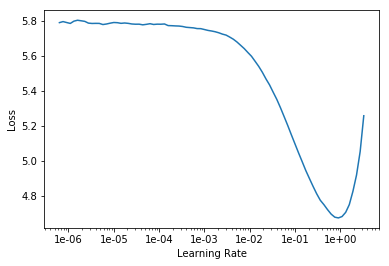

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.431820,4.833456,0.259152,00:00


In [27]:
learn.save('fit_head')

In [28]:
learn.load('fit_head');

### Fine tuning the language model

In [29]:
learn.unfreeze()

In [30]:
learn.fit_one_cycle(5, slice(1e-3, 1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.182158,3.133121,0.361607,00:00
1,3.482074,2.659829,0.395536,00:00
2,3.066633,2.626380,0.397991,00:00
3,2.743901,2.596404,0.432366,00:00
4,2.492408,2.580794,0.433036,00:00


In [31]:
learn.save('fine_tuned')

In [32]:
learn.load('fine_tuned');

In [33]:
TEXT = "I have a headache"
N_WORDS = 10
N_SENTENCES = 2

In [34]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I have a headache and feel so weak . My head hurts .
I have a headache and feel so weak . i 'm not sure if


In [35]:
learn.save_encoder('fine_tuned_enc')

# Text classifier

In [36]:
test_df = pd.read_csv('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/test.csv')

In [37]:
data_clas = TextClasDataBunch.from_df(path=dataset_dir,train_df=train_df,valid_df=valid_df,test_df = test_df,
                                      label_cols=label_cols, text_cols='Tweet')

In [38]:
data_clas.show_batch(10)

text,target
"xxbos i heard that in xxmaj china , someone died of a new type of flu xxunk from the bird flu . xxmaj that got me wondering if there is any xxunk like some xxunk to check to see if i have the flu or not . xxmaj they xxunk about the flu a lot on xxup tv , but i have no idea how they xxunk the outbreak .",
"xxbos xxmaj not only do i have a runny nose today , but i also have a stuffy nose . i 've had to breathe through my mouth , and now my mouth is crazy dry . i have an important meeting tomorrow that i ca n't miss . xxmaj this is so , so bad .",Runnynose
"xxbos i saw on my phone that they 're xxunk a part - time miko at a shrine in xxmaj tokyo . xxmaj there are fewer than there were last year , though . i wo n't be able to apply if i have a fever , so i have to take care of myself .",
"xxbos xxmaj that xxunk who was xxunk from the xxunk seems to have dengue fever . xxmaj they said that s / he came back to xxmaj tokyo this morning . xxmaj the xxup tv news said that the xxmaj ministry of xxmaj health , xxmaj labour and xxmaj welfare made an xxunk on it .",
"xxbos xxmaj we went out as a family for the first time in a long time and i had xxunk xxunk . xxmaj it was so good ! xxmaj my mom , who 's been staying in bed because of the flu , is fully recovered , too , which i 'm really glad about .",
"xxbos xxmaj you and i both have colds . i do n't have any fever medicine . xxmaj there 's a meeting at the xxunk tomorrow . i want to go to the doctor , but even with all the scientific advances , there 's no medicine that will cure you in an xxunk .",Fever;Cold
"xxbos i guess the flu is going around , but what about the bird one ? xxmaj there is no xxunk for it yet , so they 'll just kill them ? a lot of time has passed since it made the news , so i must say that 's a xxunk job xxunk",
"xxbos xxmaj this woman i work with called the office , coughing xxunk while saying that she had to take a day off because of a high fever . xxmaj then xxunk i found out on her blog that she had actually gone to an xxunk xxunk , which made me laugh .",
"xxbos xxmaj you were all , xxunk , this intense xxunk pain and exhaustion are not normal , so i went with you to the doctor and it turned out to be an ordinary cold . xxmaj xxunk that xxunk look on your face is gon na make me laugh .",Cold
"xxbos i read some of the how - to books on nasal xxunk , but xxunk of them was xxunk xxunk . i also see so many xxunk personal remedies on blogs . i think i should just go to the doctor 's and have them take a look .",Runnynose


In [39]:
data_clas

TextClasDataBunch;

Train: LabelList (1728 items)
x: TextList
xxbos i 've had an intense headache since this morning .,xxbos i got diarrhea from the rice bowl that my grandma made . i died .,xxbos xxmaj my daughter got a cold from my wife , so she 's resting at home .,xxbos xxmaj science advances , but colds still wo n't go away .,xxbos i never thought i 'd develop allergies .
y: MultiCategoryList
Headache,Diarrhea,Fever;Cold,,Hayfever;Runnynose
Path: /home/sivert/Documents/datasets/MedWeb_TestCollection/csv;

Valid: LabelList (192 items)
x: TextList
xxbos xxmaj my stomach has been hurting like hell since this morning . xxmaj of course i got diarrhea as well .,xxbos xxmaj it 's a mild headache , it 'll be fine .,xxbos xxmaj how do you say diarrhea in xxmaj english ?,xxbos i woke up with a stomachache and it turned out to be diarrhea .,xxbos xxmaj it 's xxunk that i caught a cold in xxmaj spain .
y: MultiCategoryList
Diarrhea,Headache,,Diarrhea,Cold
Path: /home/sivert/Documents/datasets

In [40]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [41]:
learn.load_encoder('fine_tuned_enc')

In [42]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


### Set up accuracy for multiple labels

In [43]:
accuracy_multi = partial(accuracy_thresh,thresh=0.5,sigmoid=True)
f1 = partial(fbeta,thresh=0.5,beta=1,sigmoid=True)

In [44]:
learn.metrics = [accuracy_multi,f1]

In [45]:
cls_weights[data_clas.train_ds.y.classes].values

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [46]:
#pos_weight = torch.cuda.FloatTensor(cls_weights[data_clas.train_ds.y.classes].values)
pos_weight = torch.cuda.FloatTensor(cls_weights[data_clas.train_ds.y.classes].values)
bce_logits_weighted = partial(F.binary_cross_entropy_with_logits, pos_weight=pos_weight)
learn.loss_func = bce_logits_weighted

In [47]:
bce_logits_weighted

functools.partial(<function binary_cross_entropy_with_logits at 0x7fe3b918dd08>, pos_weight=tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
       device='cuda:0'))

In [48]:
learn

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1728 items)
x: TextList
xxbos i 've had an intense headache since this morning .,xxbos i got diarrhea from the rice bowl that my grandma made . i died .,xxbos xxmaj my daughter got a cold from my wife , so she 's resting at home .,xxbos xxmaj science advances , but colds still wo n't go away .,xxbos i never thought i 'd develop allergies .
y: MultiCategoryList
Headache,Diarrhea,Fever;Cold,,Hayfever;Runnynose
Path: /home/sivert/Documents/datasets/MedWeb_TestCollection/csv;

Valid: LabelList (192 items)
x: TextList
xxbos xxmaj my stomach has been hurting like hell since this morning . xxmaj of course i got diarrhea as well .,xxbos xxmaj it 's a mild headache , it 'll be fine .,xxbos xxmaj how do you say diarrhea in xxmaj english ?,xxbos i woke up with a stomachache and it turned out to be diarrhea .,xxbos xxmaj it 's xxunk that i caught a cold in xxmaj spain .
y: MultiCategoryList
Diarrhea,Headache,,Diarrhea,Cold
Path: /home/sivert/Do

### Fine tuning classifier

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


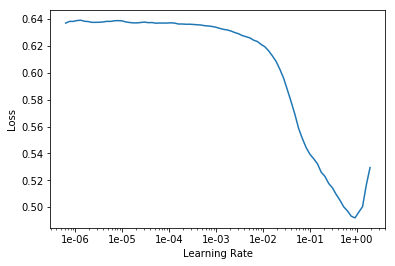

In [50]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.460551,0.331218,0.881510,0.003472,00:01


In [52]:
learn.save('first')

In [53]:
learn.load('first');

In [54]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.225676,0.177646,0.886068,0.032986,00:01


In [55]:
learn.save('second')

In [56]:
learn.load('second');

In [57]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.157889,0.115998,0.917318,0.269792,00:01


In [58]:
learn.save('third')

In [59]:
learn.load('third');

In [60]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.133281,0.130869,0.939453,0.519271,00:01
1,0.122713,0.078111,0.955078,0.568403,00:01
2,0.103130,0.073411,0.960938,0.575521,00:01
3,0.083490,0.069832,0.971354,0.641319,00:01
4,0.067209,0.074278,0.972005,0.668403,00:01


In [61]:
learn.predict("I have the flu")

(MultiCategory Influenza;Fever,
 tensor([1., 0., 0., 0., 0., 1., 0., 0.]),
 tensor([9.8943e-01, 6.9373e-05, 1.0117e-06, 5.3761e-05, 1.4369e-05, 9.9567e-01,
         2.9797e-05, 1.2535e-04]))

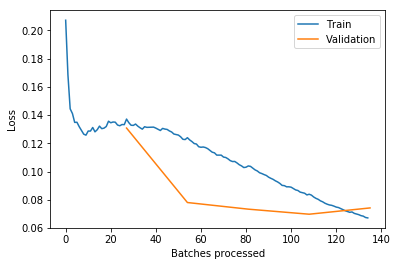

In [62]:
# print loss function and validation function
learn.recorder.plot_losses()

# Model evaluation

In [63]:
# Get the predictions from the classifier
preds=learn.get_preds()
preds

[tensor([[2.4732e-05, 7.3321e-02, 4.7549e-04,  ..., 9.2043e-04, 3.1848e-03,
          9.7216e-04],
         [5.8860e-05, 4.1366e-05, 2.5637e-05,  ..., 1.1196e-03, 1.8121e-03,
          7.3322e-03],
         [3.6358e-06, 6.2137e-02, 1.0988e-04,  ..., 3.3280e-04, 1.9190e-03,
          9.9148e-05],
         ...,
         [3.5260e-01, 6.2083e-04, 7.2432e-05,  ..., 5.2883e-01, 1.3395e-03,
          1.3291e-03],
         [7.0513e-06, 4.4806e-06, 1.5147e-06,  ..., 1.4968e-04, 1.9580e-03,
          1.0713e-03],
         [2.3037e-04, 5.1666e-04, 6.5204e-04,  ..., 5.1972e-04, 3.4767e-03,
          5.5778e-03]]), tensor([[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]])]

In [64]:
# Get all the predictions and convert to a numpy array
p=preds[0]
p = p.tolist()
p = np.asarray(p)

In [65]:
# Set all with prediction over 0.5 to 1, otherwise 0
p_01 = (p > 0.5)*1.0

In [66]:
p_01

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.]])

In [67]:
# Get validation set blueprint
y_true =pd.DataFrame(preds[1].tolist())
y_true.head(10)

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
y_true

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
# sklearn accuracy score
accuracy_score(y_true, p_01)

0.828125

In [70]:
f1_micro = f1_score(y_true, p_01, average='micro')
f1_macro = f1_score(y_true, p_01, average='macro')

print('F1 score')
print('micro: {}'.format(f1_micro))
print('macro: {}'.format(f1_macro))


F1 score
micro: 0.8859416445623343
macro: 0.889356048961736


In [71]:
precision_micro = precision_score(y_true, p_01, average='micro')
precision_macro = precision_score(y_true, p_01, average='macro')

print('Precision score')
print('micro: {}'.format(precision_micro))
print('macro: {}'.format(precision_macro))

Precision score
micro: 0.8608247422680413
macro: 0.8635669965296938


In [72]:
recall_micro = recall_score(y_true, p_01, average='micro')
recall_macro = recall_score(y_true, p_01, average='macro')

print('Recall score')
print('micro: {}'.format(recall_micro))
print('macro: {}'.format(recall_macro))

Recall score
micro: 0.912568306010929
macro: 0.919780657197537


In [95]:
a = learn.get_preds(ds_type=DatasetType.Test, ordered=True, with_loss=False)

In [96]:
a

[tensor([[5.4930e-01, 9.2362e-05, 3.1351e-06,  ..., 5.8349e-01, 5.6155e-05,
          1.7355e-04],
         [6.2006e-06, 2.2605e-07, 1.0834e-07,  ..., 2.3184e-04, 8.3238e-05,
          4.3449e-05],
         [4.7232e-04, 4.1895e-05, 5.1435e-05,  ..., 3.9817e-03, 5.5196e-04,
          1.8552e-03],
         ...,
         [2.2159e-05, 9.9228e-01, 3.2482e-05,  ..., 5.0239e-04, 7.6193e-05,
          9.4471e-05],
         [8.6839e-04, 4.9797e-05, 1.8788e-04,  ..., 1.4406e-02, 7.1275e-04,
          7.8701e-01],
         [4.6103e-02, 3.8293e-05, 2.3736e-06,  ..., 9.9985e-01, 7.5878e-05,
          3.0927e-05]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [81]:
b=a[0]
b = b.tolist()
b = np.asarray(b)

In [85]:
b

array([[8.650039e-05, 5.609917e-04, 3.674725e-04, 5.518939e-04, 3.923675e-04, 2.342268e-03, 4.812932e-02,
        1.298902e-03],
       [8.969268e-01, 6.833089e-04, 1.343367e-04, 1.907964e-03, 1.220131e-04, 9.445373e-01, 4.126191e-04,
        1.577146e-03],
       [9.131650e-03, 1.015148e-02, 1.032205e-02, 8.574014e-01, 1.640412e-02, 6.075636e-01, 1.904996e-02,
        6.089850e-01],
       [3.769016e-02, 4.994195e-03, 2.825074e-04, 3.440382e-03, 1.237960e-03, 3.627875e-01, 1.076961e-03,
        4.493618e-03],
       ...,
       [8.884303e-02, 2.108090e-05, 2.410783e-06, 2.090967e-05, 1.868133e-05, 1.845796e-01, 3.483970e-05,
        1.516246e-04],
       [8.941211e-01, 1.313572e-04, 1.062714e-05, 4.390409e-04, 1.128717e-04, 9.810032e-01, 3.090742e-04,
        1.285098e-03],
       [1.025701e-01, 7.340984e-04, 7.461761e-05, 2.091428e-04, 5.728012e-04, 2.313954e-01, 5.798578e-04,
        3.261808e-03],
       [1.919975e-07, 9.999974e-01, 1.604207e-06, 1.880013e-08, 2.732681e-05, 1.96520

In [82]:
b_01 =(b > 0.5)*1.0

In [86]:
b_01

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

In [84]:
a[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
c =pd.DataFrame(a[1].tolist())
c.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [73]:
y_pred_test, y_true_test =learn.get_preds(DatasetType.Test, with_loss=False)

In [74]:
y_pred_test

tensor([[8.6500e-05, 5.6099e-04, 3.6747e-04,  ..., 2.3423e-03, 4.8129e-02,
         1.2989e-03],
        [8.9693e-01, 6.8331e-04, 1.3434e-04,  ..., 9.4454e-01, 4.1262e-04,
         1.5771e-03],
        [9.1317e-03, 1.0151e-02, 1.0322e-02,  ..., 6.0756e-01, 1.9050e-02,
         6.0899e-01],
        ...,
        [8.9412e-01, 1.3136e-04, 1.0627e-05,  ..., 9.8100e-01, 3.0907e-04,
         1.2851e-03],
        [1.0257e-01, 7.3410e-04, 7.4618e-05,  ..., 2.3140e-01, 5.7986e-04,
         3.2618e-03],
        [1.9200e-07, 1.0000e+00, 1.6042e-06,  ..., 1.9652e-05, 6.8761e-06,
         7.5497e-06]])

In [75]:
y_true_test

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [120]:
import sklearn.metrics as skm

y_pred, y_true = learn.get_preds(ds_type = DatasetType.Test, with_loss=False)

print("Predictions generated.")
print("====================")
print("Evaluation metrics on the train, valid and test set:")
threshold = 0.5
y_pred[y_pred >= threshold] = 1
y_pred[y_pred < threshold] = 0



Predictions generated.
Evaluation metrics on the train, valid and test set:


In [122]:
y_true

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [123]:
y_pred

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])

In [121]:
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [71]:
interp = ClassificationInterpretation(learn, p_01, y_true, learn.loss_func)

TypeError: 'dim' is an invalid keyword argument for this function

In [69]:
#confusion matrix

In [70]:
print(torch.version)

<module 'torch.version' from '/home/sivert/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/version.py'>


In [72]:
#preds, y, losses = learn.get_preds(with_loss=True)
#interp = ClassificationInterpretation(data_clas, preds, y, losses)

RuntimeError: expected type torch.cuda.FloatTensor but got torch.FloatTensor

In [72]:
learn.loss_func

functools.partial(<function binary_cross_entropy_with_logits at 0x7fb1d8dcfd08>, pos_weight=tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
       device='cuda:0'))

In [73]:
#import matplotlib.cm as cm
#txt_ci = TextClassificationInterpretation.from_learner(learn)

RuntimeError: expected type torch.cuda.FloatTensor but got torch.FloatTensor

In [74]:
#txt_ci.show_top_losses(5)

# Test set avaluation

In [67]:
test_df = pd.read_csv('/home/sivert/Documents/datasets/MedWeb_TestCollection/csv/test.csv')

,ID,Tweet,Influenza,Diarrhea,Hayfever,Cough,Headache,Fever,Runnynose,Cold
0,1921en,I went on a trip and got the flu as a souvenir.,1,0,0,0,0,1,0,0
1,1922en,Difficult bosses are one kind of headache,0,0,0,0,0,0,0,0
2,1923en,I'm dying and need someone to translate for me...,0,0,0,0,0,0,0,0
3,1924en,Flu crisis.,1,0,0,0,0,1,0,0
4,1925en,"I have a horribly stuffy nose, there's no way ...",0,0,0,0,0,0,1,0
5,1926en,"I have a headache, so I've decided to go home.",0,0,0,0,1,0,0,0
6,1927en,I got the flu and everyone in my club laughed ...,1,0,0,0,0,1,0,0
7,1928en,I wonder how you say diarrhea in English.,0,0,0,0,0,0,0,0
8,1929en,"I've heard of Spanish flu and Hong Kong flu, i...",0,0,0,0,0,0,0,0
9,1930en,I wonder if dogs get things like stuffy noses?,0,0,0,0,0,0,0,0


In [78]:
learn.precict

TypeError: get_preds() got an unexpected keyword argument 'is_test'